In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('SLF-PC.TO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-20,22.030001,22.049999,22.030001,22.049999,17.091322,1762
1,2017-11-21,22.090000,22.219999,22.090000,22.219999,17.223089,5035
2,2017-11-22,22.219999,22.280001,22.219999,22.280001,17.269606,3959
3,2017-11-23,22.200001,22.320000,22.200001,22.260000,17.254097,650
4,2017-11-24,22.250000,22.260000,22.250000,22.260000,17.254097,200


In [ ]:
data = df.drop(columns=['Date'])

In [ ]:
data1 = data.drop(columns=['Adj Close'])

In [ ]:
data2 = data1.drop(columns=['Volume'])

In [ ]:
data2.head()

,Open,High,Low,Close
0,22.030001,22.049999,22.030001,22.049999
1,22.090000,22.219999,22.090000,22.219999
2,22.219999,22.280001,22.219999,22.280001
3,22.200001,22.320000,22.200001,22.260000
4,22.250000,22.260000,22.250000,22.260000


In [ ]:
datamatrix=data2.to_numpy()
print(datamatrix.shape)
print(datamatrix)

(1255, 4)
[[22.030001 22.049999 22.030001 22.049999]
 [22.09     22.219999 22.09     22.219999]
 [22.219999 22.280001 22.219999 22.280001]
 ...
 [17.9      18.01     17.75     18.01    ]
 [17.690001 18.030001 17.690001 18.      ]
 [17.99     18.030001 17.9      17.969999]]


In [ ]:
x=datamatrix[:] #,1:5
print(x)
print(x.shape)

[[22.030001 22.049999 22.030001 22.049999]
 [22.09     22.219999 22.09     22.219999]
 [22.219999 22.280001 22.219999 22.280001]
 ...
 [17.9      18.01     17.75     18.01    ]
 [17.690001 18.030001 17.690001 18.      ]
 [17.99     18.030001 17.9      17.969999]]
(1255, 4)


Using lazy window size of 20

In [ ]:
N=1255*4
w=20
print(N)
x=np.reshape(x,N,)
m=int(np.floor(N/w))
print(m)

5020
251


In [ ]:
N=w*m
x = np.asarray(x).astype('float32')
x=x[0:N]
print(x.shape)

(5020,)


In [ ]:
zind=np.arange(1,N,20)
print(zind)
print(zind.shape)
z=x[zind]
print(z.shape)
x=np.reshape(x,(m,w,1))
print(x.shape)

[   1   21   41   61   81  101  121  141  161  181  201  221  241  261
  281  301  321  341  361  381  401  421  441  461  481  501  521  541
  561  581  601  621  641  661  681  701  721  741  761  781  801  821
  841  861  881  901  921  941  961  981 1001 1021 1041 1061 1081 1101
 1121 1141 1161 1181 1201 1221 1241 1261 1281 1301 1321 1341 1361 1381
 1401 1421 1441 1461 1481 1501 1521 1541 1561 1581 1601 1621 1641 1661
 1681 1701 1721 1741 1761 1781 1801 1821 1841 1861 1881 1901 1921 1941
 1961 1981 2001 2021 2041 2061 2081 2101 2121 2141 2161 2181 2201 2221
 2241 2261 2281 2301 2321 2341 2361 2381 2401 2421 2441 2461 2481 2501
 2521 2541 2561 2581 2601 2621 2641 2661 2681 2701 2721 2741 2761 2781
 2801 2821 2841 2861 2881 2901 2921 2941 2961 2981 3001 3021 3041 3061
 3081 3101 3121 3141 3161 3181 3201 3221 3241 3261 3281 3301 3321 3341
 3361 3381 3401 3421 3441 3461 3481 3501 3521 3541 3561 3581 3601 3621
 3641 3661 3681 3701 3721 3741 3761 3781 3801 3821 3841 3861 3881 3901
 3921 

In [ ]:
x_train=x[0:188]
x_test=x[188:251]
y_train=z[0:188]
y_test=z[188:251]

print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(188, 20, 1)
(63, 20, 1)
(188,)
(63,)


In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(20,1), activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 15, verbose = 1)

Epoch 1/15
6/6 [==============================] - 4s 34ms/step - loss: 268.4010 - mean_squared_error: 268.4010
Epoch 2/15
6/6 [==============================] - 0s 30ms/step - loss: 12.5246 - mean_squared_error: 12.5246
Epoch 3/15
6/6 [==============================] - 0s 29ms/step - loss: 2.3809 - mean_squared_error: 2.3809
Epoch 4/15
6/6 [==============================] - 0s 32ms/step - loss: 1.2754 - mean_squared_error: 1.2754
Epoch 5/15
6/6 [==============================] - 0s 31ms/step - loss: 0.6407 - mean_squared_error: 0.6407
Epoch 6/15
6/6 [==============================] - 0s 31ms/step - loss: 0.5076 - mean_squared_error: 0.5076
Epoch 7/15
6/6 [==============================] - 0s 28ms/step - loss: 0.3943 - mean_squared_error: 0.3943
Epoch 8/15
6/6 [==============================] - 0s 28ms/step - loss: 0.2424 - mean_squared_error: 0.2424
Epoch 9/15
6/6 [==============================] - 0s 30ms/step - loss: 0.1861 - mean_squared_error: 0.1861
Epoch 10/15
6/6 [==============

In [ ]:
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 9ms/step


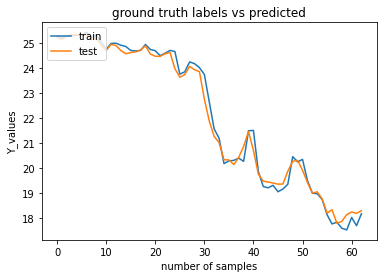

In [ ]:
plt.plot(y_test)
plt.plot(y_pred)
plt.title('ground truth labels vs predicted')
plt.ylabel('Y_values')
plt.xlabel('number of samples')
plt.legend(['train', 'test'], loc='upper left')


Using proper window size of 20

In [ ]:
N=1255*4
w=20
print(N)
x=np.reshape(x,N,)
m=int(np.floor(N/w))
print(m)

5020
251


In [ ]:
N=w*m
x = np.asarray(x).astype('float32')
xt=x[0:N+1]
print(xt.shape)
x=x[0:N]
print(np.shape(x))

(5020,)
(5020,)


In [ ]:
zind=np.arange(1,N,20) #20
print(zind)
print(zind.shape)
z=x[zind]
print(z.shape)
x=np.reshape(x,(m,w,1))
print(x.shape)

[   1   21   41   61   81  101  121  141  161  181  201  221  241  261
  281  301  321  341  361  381  401  421  441  461  481  501  521  541
  561  581  601  621  641  661  681  701  721  741  761  781  801  821
  841  861  881  901  921  941  961  981 1001 1021 1041 1061 1081 1101
 1121 1141 1161 1181 1201 1221 1241 1261 1281 1301 1321 1341 1361 1381
 1401 1421 1441 1461 1481 1501 1521 1541 1561 1581 1601 1621 1641 1661
 1681 1701 1721 1741 1761 1781 1801 1821 1841 1861 1881 1901 1921 1941
 1961 1981 2001 2021 2041 2061 2081 2101 2121 2141 2161 2181 2201 2221
 2241 2261 2281 2301 2321 2341 2361 2381 2401 2421 2441 2461 2481 2501
 2521 2541 2561 2581 2601 2621 2641 2661 2681 2701 2721 2741 2761 2781
 2801 2821 2841 2861 2881 2901 2921 2941 2961 2981 3001 3021 3041 3061
 3081 3101 3121 3141 3161 3181 3201 3221 3241 3261 3281 3301 3321 3341
 3361 3381 3401 3421 3441 3461 3481 3501 3521 3541 3561 3581 3601 3621
 3641 3661 3681 3701 3721 3741 3761 3781 3801 3821 3841 3861 3881 3901
 3921 

In [ ]:
def prepare_data(timeseries_data, n_features):
  X, y = [],[]
  for i in range(len(timeseries_data)):
    #find the end of this pattern
    end_ix = i + n_features
    #check if we are beyond the sequence
    if end_ix > len(timeseries_data)-1:
      break
    #gather input and output parts of the pattern
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
#split into samples
x,z = prepare_data(x,w)
print(x.shape), print(z.shape)

(5000, 20)
(5000,)


(None, None)

In [ ]:
x_train=x[0:4000]
x_test=x[4000:5000]
y_train=z[0:4000]
y_test=z[4000:5000]

print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(4000, 20)
(1000, 20)
(4000,)
(1000,)


In [ ]:
model = Sequential()
model.add(LSTM(250, input_shape=(20,1), activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(x_train, y_train, epochs = 25, verbose = 1)

Epoch 1/25
125/125 [==============================] - 9s 63ms/step - loss: 9.1855
Epoch 2/25
125/125 [==============================] - 8s 62ms/step - loss: 0.0637
Epoch 3/25
125/125 [==============================] - 8s 61ms/step - loss: 0.0568
Epoch 4/25
125/125 [==============================] - 8s 63ms/step - loss: 0.0582
Epoch 5/25
125/125 [==============================] - 8s 61ms/step - loss: 0.0571
Epoch 6/25
125/125 [==============================] - 8s 61ms/step - loss: 0.0513
Epoch 7/25
125/125 [==============================] - 9s 72ms/step - loss: 0.0503
Epoch 8/25
125/125 [==============================] - 8s 64ms/step - loss: 0.0463
Epoch 9/25
125/125 [==============================] - 8s 63ms/step - loss: 0.0470
Epoch 10/25
125/125 [==============================] - 8s 62ms/step - loss: 0.0600
Epoch 11/25
125/125 [==============================] - 8s 62ms/step - loss: 0.0504
Epoch 12/25
125/125 [==============================] - 8s 61ms/step - loss: 0.0452
Epoch 13/25
1

In [ ]:
y_pred_2=model.predict(x_test)

32/32 [==============================] - 1s 22ms/step


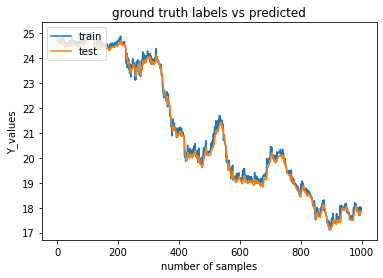

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_2)
plt.title('ground truth labels vs predicted')
plt.ylabel('Y_values')
plt.xlabel('number of samples')
plt.legend(['train', 'test'], loc='upper left')
